In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale, iradon
from scipy.misc import imresize
from scipy.signal import decimate
from PIL import Image

from os import listdir, getcwd, chdir
from os.path import isfile, join, isdir
#import cv2

In [1]:
#Function to return the polynomial fitted by +-N images surrounding a particular image in a given dataset
#Cases close to z-boundaries are handled by extrapolating the end values

def returnPolyFit(localImgPath, fileName, studyLength=800, N=10):
    
    z = np.linspace(-N,N,2*N+1)
    uInd = fileName.find('_')
    fLen = len(fileName)
    
    print(fileName[uInd+1:fLen-4])
    localInd = int(float(fileName[uInd+1:fLen-4]))
    
    
    #Create z-coordinates to import images
    zAbs = localInd - z
    zAbs = np.maximum(0, np.minimum(zAbs, studyLength-1) ) #truncate at either end
    
    
    #read in the current stack image as well as the images above and below
    #onlyFiles = [f for f in listdir(localImgPath) if isfile(join(f, localImgPath))]
    img = imread(localImgPath + fileName, as_grey=True)
    s = list(img.shape)
    s.append(2*N+1)
    
    print(s)
    
    imgArray = np.zeros(tuple(s))
    
    #obtain array of images
    for iZ in range(2*N+1):
        localFname = fileName[0:uInd]+ '_'+ str(int(zAbs[iZ]))+ '.png'
        imgArray[:,:,iZ] = imread(localImgPath + localFname, as_grey=True)
        
    #Flatten the array in order to perform a polynomial fit    
    imgArray = np.reshape(imgArray, (s[0]*s[1], s[2]))
    
    #This factor will determine the scaling of the z-coordinates to perform the polynomial fit
    factor = 0.1
    
    #Obtain the magnitude of the polynomial fit, normalized so that the images can easily be converted to uint8 later
    p = np.abs(np.transpose( np.polyfit(z*factor, np.transpose(imgArray) / np.amax(imgArray), 2) ) )
    p = np.reshape(p, (s[0], s[1], 3) )
    
    return p
    

7
[100, 100, 21]


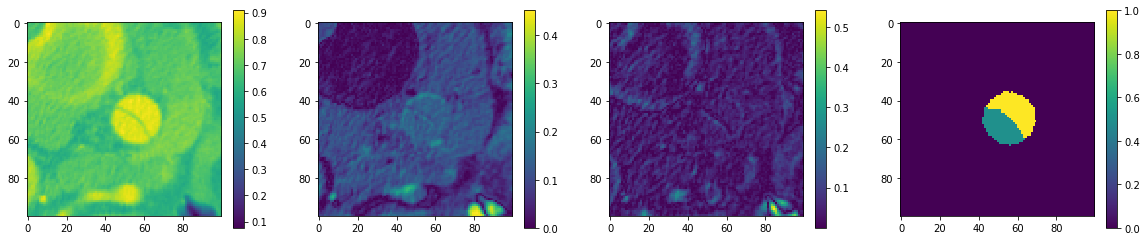

In [5]:
#Code snippet to test the polyfit function
localImgPath = '/Users/indrasen/Desktop/CS230 deep learning/project/Keras-LinkNet/data/dissectionAbsGradients/images/'
onlyfiles = [f for f in listdir(localImgPath) if isfile(join(localImgPath, f))]
studyNames = ['02BL' '02FU1' '04BL' '04FU1' '04FU2' '04FU3' '08BL' '10BL' '10FU1' '10FU2' '10FU3' '16BL' '18FU2' '25BL' '30BL' '30FU1' '35BL' '36BL' '36FU1' '36FU2' '36FU3' '41AAFUX' '45BL' '47BL']
studyLengths = [800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800]

iFile = 23
p = returnPolyFit(localImgPath, onlyfiles[iFile], 800, 10)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 4))

img = ax0.imshow(p[...,2], interpolation='nearest')
fig.colorbar(img, ax=ax0)

img = ax1.imshow(p[...,1], interpolation='nearest')
fig.colorbar(img, ax=ax1)

img = ax2.imshow(p[...,0], interpolation='nearest')
fig.colorbar(img, ax=ax2)


#Also show label to compare 
labelPath = '/Users/indrasen/Desktop/CS230 deep learning/project/Keras-LinkNet/data/dissectionAbsGradients/labels/'
imgName = onlyfiles[iFile]
sName = len(imgName)
labelName = imgName[0:sName-4]
labels = imread(labelPath + labelName + '_L.png', as_grey=True)

img = ax3.imshow(labels, interpolation='nearest')
fig.colorbar(img, ax=ax3)

plt.show()



In [7]:
localImgPath = '/Users/indrasen/Desktop/CS230 deep learning/project/Keras-LinkNet/data/dissectionAbsGradients/images/'

#Code snippet to convert all images to the polynomial fit format
onlyfiles = [f for f in listdir(localImgPath) if isfile(join(localImgPath, f))]
for iFile in range(0,len(onlyfiles)):

    #img = imread(localImgPath + onlyfiles[iFile], as_grey=False)
    
    #obtain the surrounding z slices as well (-10 to 10 of the local index)
    img = returnPolyFit(localImgPath, onlyfiles[iFile], 800, 10)
    
    #if (img.shape[-1] != 3):
    #    rgbImg = np.dstack((img,img,img))
    #    #imgRGB = cv2.merge((img, img, img))
    #img = imresize(arr = img, size = (100, 100), interp = 'lanczos')
    print(img.shape)
    #rgbImg = img
    rgbImg = np.uint8(np.dstack((img[:,:,2],img[:,:,1],img[:,:,0]))*255)
    print(rgbImg.shape)
    img = Image.fromarray(rgbImg)
    img.save(localImgPath + onlyfiles[iFile])
    print('Saved image: ' + onlyfiles[iFile])

458
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_458.png
585
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_585.png
7
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_7.png
297
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_297.png
88
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_88.png
456
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_456.png
595
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_595.png
645
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_645.png
398
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_398.png
747
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_747.png
123
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_123.png
330
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_330.png
109
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_109.png
766
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_690.png
540
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_540.png
244
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_244.png
600
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_600.png
194
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_194.png
136
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_136.png
303
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_303.png
285
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_285.png
401
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_401.png
77
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_77.png
73
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_73.png
341
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_341.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_427.png
367
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_3

Saved image: 41AAFUX_672.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_427.png
114
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_114.png
485
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_485.png
130
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_130.png
323
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_323.png
17
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_17.png
309
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_309.png
527
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_527.png
736
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_736.png
159
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_159.png
586
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_586.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_619.png
608
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_608.png
730
[100, 100,

(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_309.png
31
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_31.png
241
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_241.png
425
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_425.png
191
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_191.png
693
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_693.png
404
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_404.png
181
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_181.png
447
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_447.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_656.png
792
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_792.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_269.png
19
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_19.png
193
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_204.png
640
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_640.png
144
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_144.png
754
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_754.png
294
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_294.png
174
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_174.png
508
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_508.png
288
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_288.png
291
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_291.png
86
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_86.png
21
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_21.png
58
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_58.png
0
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_0.png
155
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_155.png
7

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_334.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_426.png
436
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_436.png
182
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_182.png
79
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_79.png
123
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_123.png
277
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_277.png
774
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_774.png
330
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_330.png
224
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_224.png
434
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_434.png
235
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_235.png
575
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_575.png
73
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_73

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_81.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_183.png
437
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_437.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_427.png
335
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_335.png
319
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_319.png
8
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_8.png
50
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_50.png
4
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_4.png
247
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_247.png
433
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_433.png
219
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_219.png
321
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_321.png
409
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_409.png
74

(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_755.png
145
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_145.png
205
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_205.png
641
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_641.png
591
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_591.png
452
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_452.png
533
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_533.png
706
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_706.png
680
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_680.png
491
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_491.png
744
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_744.png
694
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_694.png
485
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_485.png
750
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_692.png
190
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_190.png
30
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_30.png
424
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_424.png
240
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_240.png
184
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_184.png
254
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_254.png
430
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_430.png
24
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_24.png
194
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_194.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_411.png
686
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_686.png
518
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_518.png
71
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30F

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_57.png
240
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_240.png
737
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_737.png
526
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_526.png
308
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_308.png
16
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_16.png
322
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_322.png
131
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_131.png
484
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_484.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_426.png
115
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_115.png
336
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_336.png
559
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_559.png
125
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10

Saved image: 18FU2_651.png
730
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_730.png
366
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_366.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_426.png
235
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_235.png
527
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_527.png
718
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_718.png
679
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_679.png
644
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_644.png
455
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_455.png
791
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_791.png
225
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_225.png
693
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_693.png
368
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_368.png
543
[100, 100, 21]

(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_399.png
441
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_441.png
652
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_652.png
582
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_582.png
592
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_592.png
280
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_280.png
678
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_678.png
771
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_771.png
685
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_685.png
494
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_494.png
329
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_329.png
134
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_134.png
750
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_750.png
4
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25

557
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_557.png
687
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_687.png
347
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_347.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_183.png
253
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_253.png
617
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_617.png
314
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_314.png
121
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_121.png
54
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_54.png
472
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_472.png
647
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_647.png
726
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_726.png
535
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_535.png
171
[100, 100, 21]
(100, 100, 3)
(100, 100, 

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_3.png
478
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_478.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_183.png
94
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_94.png
721
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_721.png
530
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_530.png
430
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_430.png
103
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_103.png
492
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_492.png
127
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_127.png
334
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_334.png
31
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_31.png
727
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_727.png
655
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_65

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_709.png
684
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_684.png
413
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_413.png
196
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_196.png
578
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_578.png
478
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_478.png
669
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_669.png
186
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_186.png
26
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_26.png
432
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_432.png
256
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_256.png
254
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_254.png
794
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_794.png
184
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10F

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_28.png
752
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_752.png
179
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_179.png
696
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_696.png
487
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_487.png
319
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_319.png
36
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_36.png
108
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_108.png
726
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_726.png
142
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_142.png
535
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_535.png
163
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_163.png
91
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_91.png
286
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_286.p

Saved image: 02BL_251.png
323
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_323.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_431.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_222.png
409
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_409.png
562
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_562.png
64
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_64.png
279
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_279.png
260
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_260.png
134
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_134.png
763
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_763.png
327
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_327.png
423
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_423.png
233
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_233.png
419
[100, 100, 21]
(1

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_444.png
58
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_58.png
356
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_356.png
430
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_430.png
322
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_322.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_249.png
250
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_250.png
47
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_47.png
99
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_99.png
420
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_420.png
194
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_194.png
59
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_59.png
434
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_434.png
180
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_180.png
42

(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_753.png
178
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_178.png
29
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_29.png
168
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_168.png
152
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_152.png
742
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_742.png
282
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_282.png
586
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_586.png
212
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_212.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_656.png
708
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_708.png
711
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_711.png
524
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_524.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_187.png
668
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_668.png
479
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_479.png
579
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_579.png
412
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_412.png
197
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_197.png
685
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_685.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_183.png
406
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_406.png
691
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_691.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_269.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_427.png
243
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_243.png
33
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAF

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_453.png
335
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_335.png
126
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_126.png
493
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_493.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_431.png
102
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_102.png
531
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_531.png
720
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_720.png
525
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_525.png
734
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_734.png
118
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_118.png
15
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_15.png
321
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_321.png
132
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 1

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_534.png
170
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_170.png
727
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_727.png
646
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_646.png
473
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_473.png
55
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_55.png
359
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_359.png
419
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_419.png
232
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_232.png
786
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_786.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_222.png
218
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_218.png
530
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_530.png
408
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_532.png
769
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_769.png
748
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_748.png
334
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_334.png
127
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_127.png
310
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_310.png
623
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_623.png
92
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_92.png
681
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_681.png
476
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_476.png
145
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_145.png
295
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_295.png
591
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_591.png
1
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image:

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_160.png
463
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_463.png
45
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_45.png
737
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_737.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_656.png
220
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_220.png
430
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_430.png
508
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_508.png
796
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_796.png
409
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_409.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_222.png
349
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_349.png
148
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_148.png
643
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_6

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_134.png
39
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_39.png
509
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_509.png
718
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_718.png
78
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_78.png
652
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_652.png
791
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_791.png
225
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_225.png
441
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_441.png
204
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_204.png
678
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_678.png
781
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_781.png
410
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_410.png
384
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_3

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_245.png
195
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_195.png
691
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_691.png
541
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_541.png
482
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_482.png
285
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_285.png
227
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_227.png
714
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_714.png
523
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_523.png
730
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_730.png
509
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_509.png
136
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_136.png
327
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_327.png
290
[100, 100, 21]
(100, 100, 3)
(100, 100

(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_521.png
11
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_11.png
150
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_150.png
642
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_642.png
124
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_124.png
636
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_636.png
247
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_247.png
108
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_108.png
626
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_626.png
392
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_392.png
582
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_582.png
657
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_657.png
79
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_79.png
446
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_446.p

(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_233.png
418
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_418.png
75
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_75.png
573
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_573.png
680
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_680.png
215
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_215.png
491
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_491.png
555
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_555.png
354
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_354.png
544
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_544.png
297
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_297.png
60
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_60.png
517
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_517.png
722
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_72

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_296.png
545
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_545.png
355
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_355.png
554
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_554.png
214
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_214.png
490
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_490.png
681
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_681.png
540
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_540.png
484
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_484.png
200
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_200.png
695
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_695.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_445.png
0
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_0.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_61.p

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_109.png
246
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_246.png
637
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_637.png
125
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_125.png
559
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_559.png
252
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_252.png
623
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_623.png
131
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_131.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_619.png
387
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_387.png
633
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_633.png
758
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_758.png
10
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_10.png
285
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_28

(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_284.png
359
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_359.png
725
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_725.png
536
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_536.png
701
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_701.png
15
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_15.png
232
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_232.png
290
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_290.png
332
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_332.png
123
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_123.png
378
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_378.png
781
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_781.png
454
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_454.png
645
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_780.png
440
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_440.png
224
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_224.png
790
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_790.png
653
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_653.png
79
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_79.png
230
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_230.png
454
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_454.png
784
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_784.png
647
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_647.png
649
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_649.png
794
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_794.png
211
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_211.png
577
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_193.png
131
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_131.png
304
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_304.png
484
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_484.png
697
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_697.png
357
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_357.png
547
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_547.png
509
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_509.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_431.png
221
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_221.png
657
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_657.png
736
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_736.png
44
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_44.png
462
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45B

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_130.png
307
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_307.png
634
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_634.png
696
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_696.png
85
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_85.png
525
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_525.png
734
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_734.png
309
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_309.png
387
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_387.png
243
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_243.png
282
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_282.png
461
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_461.png
152
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_152.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image:

(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_641.png
720
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_720.png
52
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_52.png
474
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_474.png
788
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_788.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_427.png
237
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_237.png
436
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_436.png
0
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_0.png
376
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_376.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_445.png
708
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_708.png
669
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_669.png
654
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_65

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_796.png
378
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_378.png
278
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_278.png
645
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_645.png
456
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_456.png
232
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_232.png
786
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_786.png
51
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_51.png
146
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_146.png
293
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_293.png
84
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_84.png
606
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_606.png
393
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_393.png
407
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_407

(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_456.png
647
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_647.png
783
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_783.png
278
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_278.png
330
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_330.png
121
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_121.png
292
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_292.png
230
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_230.png
17
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_17.png
703
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_703.png
534
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_534.png
727
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_727.png
536
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_536.png
352
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_621.png
250
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_250.png
683
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_683.png
490
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_490.png
740
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_740.png
273
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_273.png
584
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_584.png
394
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_394.png
257
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_257.png
595
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_595.png
451
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_451.png
640
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_640.png
337
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_337.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02B

77
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_77.png
280
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_280.png
654
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_654.png
735
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_735.png
708
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_708.png
519
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_519.png
500
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_500.png
2
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_2.png
447
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_447.png
797
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_797.png
63
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_63.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_202.png
486
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_486.png
697
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_378.png
281
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_281.png
76
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_76.png
342
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_342.png
552
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_552.png
76
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_76.png
782
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_782.png
452
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_452.png
515
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_515.png
641
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_641.png
720
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_720.png
62
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_62.png
295
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_295.png
356
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved 

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_620.png
132
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_132.png
630
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_630.png
384
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_384.png
624
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_624.png
390
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_390.png
319
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_319.png
278
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_278.png
245
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_245.png
634
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_634.png
126
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_126.png
168
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_168.png
640
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_640.png
778
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_718.png
732
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_732.png
48
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_48.png
39
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_39.png
521
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_521.png
716
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_716.png
225
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_225.png
287
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_287.png
480
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_480.png
693
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_693.png
543
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_543.png
247
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_247.png
787
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_787.png
197
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 1

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_457.png
644
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_644.png
279
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_279.png
379
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_379.png
212
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_212.png
797
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_797.png
469
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_469.png
783
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_783.png
206
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_206.png
793
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_793.png
443
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_443.png
227
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_227.png
650
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_650.png
136
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 3

(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_351.png
295
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_295.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_411.png
377
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_377.png
1
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_1.png
437
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_437.png
236
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_236.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_426.png
789
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_789.png
475
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_475.png
53
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_53.png
721
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_721.png
640
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_640.png
532
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_53

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_283.png
242
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_242.png
386
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_386.png
592
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_592.png
705
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_705.png
379
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_379.png
280
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_280.png
140
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_140.png
724
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_724.png
290
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_290.png
353
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_353.png
435
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_435.png
626
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_626.png
219
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_691.png
105
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_105.png
541
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_541.png
245
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_245.png
195
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_195.png
455
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_455.png
386
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_386.png
444
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_444.png
791
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_791.png
304
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_304.png
580
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_580.png
462
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_462.png
14
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_14.png
322
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_153.png
340
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_340.png
680
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_680.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_426.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_249.png
635
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_635.png
380
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_380.png
611
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_611.png
322
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_322.png
35
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_35.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_222.png
268
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_268.png
737
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_737.png
283
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 3

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_208.png
467
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_467.png
782
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_782.png
593
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_593.png
298
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_298.png
446
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_446.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_222.png
52
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_52.png
757
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_757.png
694
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_694.png
544
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_544.png
320
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_320.png
759
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_759.png
76
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 0

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_623.png
267
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_267.png
737
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_737.png
127
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_127.png
498
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_498.png
726
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_726.png
48
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_48.png
184
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_184.png
700
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_700.png
395
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_395.png
782
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_782.png
89
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_89.png
591
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_591.png
169
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_169

(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_598.png
357
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_357.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_445.png
4
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_4.png
323
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_323.png
509
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_509.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_431.png
319
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_319.png
39
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_39.png
752
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_752.png
543
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_543.png
258
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_258.png
687
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_687.png
518
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_518.p

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_224.png
169
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_169.png
33
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_33.png
39
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_39.png
94
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_94.png
597
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_597.png
454
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_454.png
784
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_784.png
519
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_519.png
332
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_332.png
686
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_686.png
259
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_259.png
542
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_542.png
753
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_753.

(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_765.png
550
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_550.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_431.png
357
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_357.png
236
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_236.png
294
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_294.png
144
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_144.png
500
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_500.png
640
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_640.png
168
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_168.png
590
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_590.png
88
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_88.png
783
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_783.png
394
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04B

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_466.png
209
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_209.png
197
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_197.png
685
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_685.png
300
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_300.png
77
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_77.png
758
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_758.png
321
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_321.png
545
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_545.png
695
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_695.png
756
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_756.png
551
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_551.png
335
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_335.png
681
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36

(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_0.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_445.png
795
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_795.png
545
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_545.png
754
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_754.png
690
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_690.png
178
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_178.png
75
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_75.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_269.png
223
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_223.png
34
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_34.png
610
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_610.png
323
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_323.png
381
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_38

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_518.png
323
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_323.png
508
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_508.png
11
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_11.png
15
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_15.png
463
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_463.png
349
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_349.png
47
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_47.png
350
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_350.png
141
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_141.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_222.png
530
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_530.png
39
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_39.png
520
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_520.png
7

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_434.png
779
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_779.png
568
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_568.png
287
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_287.png
733
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_733.png
157
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_157.png
344
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_344.png
585
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_585.png
712
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_712.png
297
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_297.png
679
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_679.png
388
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_388.png
391
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_391.png
86
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_

Saved image: 04FU2_745.png
624
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_624.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_619.png
408
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_408.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_411.png
37
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_37.png
112
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_112.png
556
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_556.png
686
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_686.png
442
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_442.png
182
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_182.png
252
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_252.png
268
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_268.png
391
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_391.png
324
[100, 100, 21]


(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_742.png
235
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_235.png
22
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_22.png
608
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_608.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_431.png
622
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_622.png
397
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_397.png
606
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_606.png
335
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_335.png
341
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_341.png
149
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_149.png
150
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_150.png
730
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_730.png
294
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_795.png
693
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_693.png
10
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_10.png
316
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_316.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_61.png
579
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_579.png
181
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_181.png
740
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_740.png
337
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_337.png
553
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_553.png
683
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_683.png
766
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_766.png
72
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_72.png
255
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_

Saved image: 36FU2_7.png
773
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_773.png
546
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_546.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_427.png
634
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_634.png
270
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_270.png
130
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_130.png
720
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_720.png
618
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_618.png
795
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_795.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_656.png
586
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_586.png
282
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_282.png
152
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_152.png
516
[100, 100, 21

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_728.png
468
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_468.png
340
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_340.png
278
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_278.png
89
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_89.png
452
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_452.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_269.png
442
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_442.png
792
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_792.png
581
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_581.png
82
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_82.png
529
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_529.png
324
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_324.png
690
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_690

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_441.png
251
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_251.png
369
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_369.png
791
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_791.png
345
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_345.png
701
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_701.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_202.png
156
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_156.png
528
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_528.png
83
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_83.png
580
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_580.png
793
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_793.png
268
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_268.png
443
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Sav

(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_559.png
484
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_484.png
101
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_101.png
396
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_396.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_619.png
721
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_721.png
131
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_131.png
635
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_635.png
271
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_271.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_426.png
547
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_547.png
772
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_772.png
6
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_6.png
730
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_397.png
184
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_184.png
73
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_73.png
767
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_767.png
254
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_254.png
532
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_532.png
590
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_590.png
459
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_459.png
236
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_236.png
478
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_478.png
623
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_623.png
89
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_89.png
432
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_432.png
794
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02B

(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_281.png
67
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_67.png
721
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_721.png
295
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_295.png
731
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_731.png
148
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_148.png
151
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_151.png
340
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_340.png
637
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_637.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_426.png
769
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_769.png
53
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_53.png
1
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_1.png
745
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_745.png


Saved image: 04FU2_750.png
631
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_631.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_269.png
390
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_390.png
253
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_253.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_183.png
443
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_443.png
687
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_687.png
113
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_113.png
557
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_557.png
409
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_409.png
36
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_36.png
410
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_410.png
625
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_625.png
744
[100, 100, 21]

(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_726.png
142
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_142.png
292
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_292.png
282
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_282.png
707
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_707.png
168
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_168.png
590
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_590.png
678
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_678.png
713
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_713.png
296
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_296.png
584
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_584.png
345
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_345.png
156
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_156.png
732
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_103.png
547
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_547.png
697
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_697.png
635
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_635.png
754
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_754.png
608
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_608.png
419
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_419.png
26
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_26.png
400
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_400.png
279
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_279.png
380
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_380.png
193
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_193.png
453
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_453.png
243
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_350.png
534
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_534.png
143
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_143.png
7
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_7.png
218
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_218.png
625
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_625.png
252
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_252.png
436
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_436.png
273
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_273.png
318
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_318.png
387
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_387.png
196
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_196.png
267
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_267.png
408
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Save

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_218.png
68
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_68.png
99
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_99.png
232
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_232.png
536
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_536.png
594
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_594.png
393
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_393.png
250
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_250.png
763
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_763.png
77
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_77.png
180
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_180.png
684
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_684.png
554
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_554.png
747
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image:

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_135.png
725
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_725.png
97
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_97.png
483
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_483.png
137
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_137.png
72
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_72.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_619.png
556
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_556.png
747
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_747.png
127
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_127.png
66
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_66.png
635
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_635.png
153
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_153.png
641
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_641.

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_494.png
111
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_111.png
386
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_386.png
549
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_549.png
705
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_705.png
341
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_341.png
152
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_152.png
206
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_206.png
586
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_586.png
795
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_795.png
255
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_255.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_445.png
244
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_244.png
504
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 3

(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_539.png
92
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_92.png
782
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_782.png
279
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_279.png
452
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_452.png
591
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_591.png
680
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_680.png
334
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_334.png
609
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_609.png
768
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_768.png
755
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_755.png
544
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_544.png
324
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_324.png
436
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_190.png
560
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_560.png
383
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_383.png
487
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_487.png
757
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_757.png
297
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_297.png
66
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_66.png
138
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_138.png
544
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_544.png
286
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_286.png
119
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_119.png
153
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_153.png
14
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_14.png
342
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_474.png
41
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_41.png
455
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_455.png
231
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_231.png
225
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_225.png
441
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_441.png
55
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_55.png
785
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_785.png
594
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_594.png
460
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_460.png
71
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_71.png
683
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_683.png
306
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_306.png
569
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3

(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_650.png
390
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_390.png
641
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_641.png
785
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_785.png
101
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_101.png
594
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_594.png
655
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_655.png
115
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_115.png
791
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_791.png
580
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_580.png
314
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_314.png
750
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_750.png
480
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_480.png
543
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2

(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_399.png
184
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_184.png
254
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_254.png
397
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_397.png
319
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_319.png
532
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_532.png
65
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_65.png
459
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_459.png
658
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_658.png
153
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_153.png
342
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_342.png
55
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_55.png
522
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_522.png
308
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_581.png
179
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_179.png
293
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_293.png
716
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_716.png
153
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_153.png
737
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_737.png
283
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_283.png
340
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_340.png
796
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_796.png
366
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_366.png
655
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_655.png
585
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_585.png
281
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_281.png
151
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image

(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_15.png
327
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_327.png
11
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_11.png
526
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_526.png
336
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_336.png
365
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_365.png
150
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_150.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_222.png
666
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_666.png
694
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_694.png
544
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_544.png
100
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_100.png
25
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_25.png
403
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_403

Saved image: 04FU1_327.png
614
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_614.png
385
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_385.png
30
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_30.png
227
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_227.png
409
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_409.png
694
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_694.png
71
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_71.png
750
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_750.png
541
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_541.png
582
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_582.png
791
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_791.png
441
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_441.png
4
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_4.png
172
[100, 100, 21]
(100

(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_108.png
156
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_156.png
347
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_347.png
736
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_736.png
726
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_726.png
292
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_292.png
60
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_60.png
390
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_390.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_183.png
6
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_6.png
54
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_54.png
742
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_742.png
629
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_629.png
630
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_630.png

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_787.png
232
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_232.png
353
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_353.png
504
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_504.png
140
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_140.png
290
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_290.png
262
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_262.png
626
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_626.png
435
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_435.png
554
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_554.png
569
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_569.png
778
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_778.png
761
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_761.png
118
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47

Saved image: 02BL_585.png
238
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_238.png
660
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_660.png
483
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_483.png
106
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_106.png
58
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_58.png
391
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_391.png
769
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_769.png
53
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_53.png
550
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_550.png
127
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_127.png
743
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_743.png
493
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_493.png
253
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_253.png
478
[100, 100, 21]
(

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_85.png
28
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_28.png
445
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_445.png
795
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_795.png
586
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_586.png
347
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_347.png
455
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_455.png
235
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_235.png
178
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_178.png
22
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_22.png
588
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_588.png
29
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_29.png
553
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_553.png
742
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_742

Saved image: 10FU3_754.png
294
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_294.png
484
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_484.png
547
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_547.png
65
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_65.png
285
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_285.png
341
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_341.png
150
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_150.png
17
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_17.png
291
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_291.png
579
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_579.png
355
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_355.png
144
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_144.png
187
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_187.png
394
[100, 100, 21]
(100,

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_305.png
779
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_779.png
680
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_680.png
72
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_72.png
192
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_192.png
49
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_49.png
753
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_753.png
324
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_324.png
540
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_540.png
690
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_690.png
56
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_56.png
226
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_226.png
442
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_442.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_6

(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_583.png
792
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_792.png
116
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_116.png
483
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_483.png
753
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_753.png
317
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_317.png
614
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_614.png
540
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_540.png
421
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_421.png
194
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_194.png
69
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_69.png
387
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_387.png
647
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_647.png
497
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_193.png
380
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_380.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_269.png
541
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_541.png
479
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_479.png
253
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_253.png
433
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_433.png
622
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_622.png
129
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_129.png
42
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_42.png
355
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_355.png
179
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_179.png
144
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_144.png
535
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_535

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_622.png
294
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_294.png
720
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_720.png
144
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_144.png
357
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_357.png
359
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_359.png
596
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_596.png
284
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_284.png
701
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_701.png
708
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_708.png
497
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_497.png
553
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_553.png
742
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_742.png
781
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04

Saved image: 02FU1_43.png
514
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_514.png
504
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_504.png
216
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_216.png
9
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_9.png
175
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_175.png
148
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_148.png
73
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_73.png
364
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_364.png
510
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_510.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_202.png
161
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_161.png
370
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_370.png
67
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_67.png
369
[100, 100, 21]
(100, 100, 3

Saved image: 04FU3_41.png
760
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_760.png
571
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_571.png
142
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_142.png
471
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_471.png
166
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_166.png
375
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_375.png
465
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_465.png
156
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_156.png
172
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_172.png
799
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_799.png
361
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_361.png
55
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_55.png
158
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_158.png
774
[100, 100

Saved image: 36FU3_203.png
229
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_229.png
82
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_82.png
446
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_446.png
778
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_778.png
388
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_388.png
57
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_57.png
320
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_320.png
26
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_26.png
776
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_776.png
565
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_565.png
301
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_301.png
263
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_263.png
44
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_44.png
750
[100, 100, 21]


(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_377.png
721
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_721.png
789
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_789.png
206
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_206.png
671
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_671.png
15
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_15.png
208
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_208.png
799
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_799.png
650
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_650.png
299
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_299.png
759
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_759.png
489
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_489.png
136
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_136.png
68
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_736.png
372
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_372.png
476
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_476.png
266
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_266.png
97
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_97.png
277
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_277.png
537
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_537.png
31
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_31.png
448
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_448.png
263
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_263.png
798
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_798.png
88
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_88.png
523
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_523.png
25
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_25.p

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_33.png
174
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_174.png
547
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_547.png
563
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_563.png
41
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_41.png
388
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_388.png
770
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_770.png
679
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_679.png
205
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_205.png
585
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_585.png
712
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_712.png
221
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_221.png
287
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_287.png
403
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 1

(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_95.png
677
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_677.png
198
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_198.png
389
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_389.png
663
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_663.png
708
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_708.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_202.png
509
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_509.png
161
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_161.png
599
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_599.png
649
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_649.png
673
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_673.png
81
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_81.png
490
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_49

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_216.png
377
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_377.png
640
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_640.png
17
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_17.png
100
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_100.png
666
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_666.png
83
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_83.png
126
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_126.png
624
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_624.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_411.png
570
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_570.png
180
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_180.png
327
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_327.png
763
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU

Saved image: 45BL_9.png
161
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_161.png
354
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_354.png
657
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_657.png
2
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_2.png
213
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_213.png
307
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_307.png
517
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_517.png
316
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_316.png
24
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_24.png
20
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_20.png
456
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_456.png
330
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_330.png
398
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_398.png
470
[100, 100, 21]
(100, 10

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_680.png
114
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_114.png
427
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_427.png
481
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_481.png
205
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_205.png
429
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_429.png
638
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_638.png
95
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_95.png
612
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_612.png
401
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_401.png
367
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_367.png
174
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_174.png
710
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_710.png
369
[100, 100, 21]
(100, 100, 3)
(100, 100, 3

(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_176.png
401
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_401.png
418
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_418.png
610
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_610.png
573
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_573.png
261
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_261.png
398
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_398.png
271
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_271.png
638
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_638.png
764
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_764.png
605
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_605.png
430
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_430.png
16
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_16.png
429
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_42

(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_627.png
480
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_480.png
214
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_214.png
681
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_681.png
629
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_629.png
701
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_701.png
47
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_47.png
360
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_360.png
171
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_171.png
168
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_168.png
711
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_711.png
294
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_294.png
765
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_765.png
73
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_749.png
374
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_374.png
165
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_165.png
274
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_274.png
747
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_747.png
53
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_53.png
68
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_68.png
763
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_763.png
19
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_19.png
570
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_570.png
188
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_188.png
216
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_216.png
479
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_479.png
785
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_577.png
121
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_121.png
189
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_189.png
579
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_579.png
135
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_135.png
549
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_549.png
19
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_19.png
60
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_60.png
770
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_770.png
114
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_114.png
563
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_563.png
205
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_205.png
672
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_672.png
638
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04B

Saved image: 10FU1_475.png
94
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_94.png
274
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_274.png
534
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_534.png
32
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_32.png
252
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_252.png
339
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_339.png
512
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_512.png
27
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_27.png
329
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_329.png
503
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_503.png
313
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_313.png
417
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_417.png
33
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_33.png
758
[100, 100, 21]
(100, 

(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_592.png
705
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_705.png
236
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_236.png
206
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_206.png
586
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_586.png
222
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_222.png
711
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_711.png
611
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_611.png
400
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_400.png
284
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_284.png
489
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_489.png
759
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_759.png
49
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_49.png
30
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 0

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_762.png
573
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_573.png
293
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_293.png
507
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_507.png
598
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_598.png
790
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_790.png
789
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_789.png
203
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_203.png
59
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_59.png
229
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_229.png
616
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_616.png
407
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_407.png
170
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_170.png
361
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_3

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_131.png
602
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_602.png
413
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_413.png
318
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_318.png
66
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_66.png
388
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_388.png
770
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_770.png
648
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_648.png
659
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_659.png
119
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_119.png
52
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_52.png
28
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_28.png
714
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_714.png
281
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved im

(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_473.png
188
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_188.png
248
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_248.png
272
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_272.png
462
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_462.png
395
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_395.png
576
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_576.png
132
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_132.png
17
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_17.png
431
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_431.png
428
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_428.png
639
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_639.png
604
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_604.png
765
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_428.png
96
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_96.png
611
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_611.png
402
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_402.png
198
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_198.png
390
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_390.png
389
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_389.png
693
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_693.png
434
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_434.png
107
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_107.png
603
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_603.png
410
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_410.png
629
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_629.png
216
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 1

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_204.png
516
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_516.png
376
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_376.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_61.png
167
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_167.png
228
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_228.png
51
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_51.png
506
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_506.png
260
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_260.png
410
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_410.png
409
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_409.png
601
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_601.png
270
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_270.png
389
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_389.

(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_10.png
107
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_107.png
298
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_298.png
647
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_647.png
446
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_446.png
145
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_145.png
370
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_370.png
211
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_211.png
706
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_706.png
116
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_116.png
670
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_670.png
748
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_748.png
623
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_623.png
577
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_5

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_34.png
332
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_332.png
45
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_45.png
454
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_454.png
90
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_90.png
84
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_84.png
211
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_211.png
475
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_475.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_61.png
701
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_701.png
240
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_240.png
604
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_604.png
743
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_743.png
417
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved im

(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_105.png
761
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_761.png
124
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_124.png
558
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_558.png
729
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_729.png
642
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_642.png
663
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_663.png
214
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_214.png
629
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_629.png
438
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_438.png
677
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_677.png
200
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_200.png
13
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_13.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU

Saved image: 10BL_8.png
365
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_365.png
477
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_477.png
217
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_217.png
349
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_349.png
388
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_388.png
199
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_199.png
467
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_467.png
518
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_518.png
473
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_473.png
258
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_258.png
789
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_789.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_249.png
371
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_371.png
459
[100, 100, 21]
(10

(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_377.png
138
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_138.png
35
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_35.png
172
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_172.png
363
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_363.png
541
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_541.png
776
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_776.png
47
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_47.png
119
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_119.png
565
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_565.png
203
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_203.png
714
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_714.png
227
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_227.png
583
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45B

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_327.png
21
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_21.png
698
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_698.png
548
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_548.png
175
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_175.png
364
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_364.png
759
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_759.png
773
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_773.png
78
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_78.png
560
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_560.png
198
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_198.png
264
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_264.png
757
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_757.png
43
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_149.png
453
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_453.png
428
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_428.png
247
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_247.png
266
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_266.png
402
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_402.png
611
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_611.png
94
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_94.png
177
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_177.png
364
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_364.png
500
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_500.png
521
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_521.png
179
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_179.png
589
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 0

Saved image: 02FU1_78.png
444
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_444.png
201
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_201.png
645
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_645.png
346
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_346.png
48
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_48.png
173
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_173.png
505
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_505.png
315
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_315.png
651
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_651.png
4
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_4.png
215
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_215.png
352
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_352.png
167
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_167.png
511
[100, 100, 21]
(100,

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_709.png
375
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_375.png
166
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_166.png
662
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_662.png
351
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_351.png
393
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_393.png
104
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_104.png
437
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_437.png
690
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_690.png
600
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_600.png
413
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_413.png
439
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_439.png
491
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_491.png
215
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved im

(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_159.png
375
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_375.png
62
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_62.png
52
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_52.png
505
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_505.png
18
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_18.png
44
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_44.png
149
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_149.png
765
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_765.png
574
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_574.png
474
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_474.png
147
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_147.png
370
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_370.png
788
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_78

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_773.png
190
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_190.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_61.png
777
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_777.png
605
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_605.png
414
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_414.png
548
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_548.png
429
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_429.png
479
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_479.png
163
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_163.png
372
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_372.png
286
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_286.png
703
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_703.png
739
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_82.png
796
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_796.png
665
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_665.png
213
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_213.png
372
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_372.png
161
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_161.png
525
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_525.png
782
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_782.png
96
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_96.png
724
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_724.png
89
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_89.png
129
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_129.png
702
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_702.png
607
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_72.png
571
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_571.png
106
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_106.png
762
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_762.png
299
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_299.png
127
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_127.png
79
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_79.png
748
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_748.png
288
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_288.png
498
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_498.png
594
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_594.png
377
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_377.png
733
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_733.png
230
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_697.png
312
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_312.png
328
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_328.png
400
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_400.png
538
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_538.png
501
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_501.png
241
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_241.png
404
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_404.png
20
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_20.png
617
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_617.png
776
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_776.png
543
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_543.png
34
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_34.png
428
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_42

(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_230.png
594
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_594.png
518
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_518.png
213
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_213.png
662
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_662.png
90
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_90.png
588
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_588.png
170
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_170.png
658
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_658.png
672
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_672.png
719
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_719.png
51
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_51.png
9
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_9.png
114
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_114.

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_764.png
577
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_577.png
273
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_273.png
54
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_54.png
740
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_740.png
373
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_373.png
162
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_162.png
339
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_339.png
415
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_415.png
604
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_604.png
782
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_782.png
515
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_515.png
281
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_281.png
211
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU

(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_758.png
549
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_549.png
79
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_79.png
174
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_174.png
367
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_367.png
503
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_503.png
522
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_522.png
799
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_799.png
449
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_449.png
244
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_244.png
638
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_638.png
265
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_265.png
401
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_401.png
612
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36F

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_25.png
538
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_538.png
21
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_21.png
313
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_313.png
453
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_453.png
31
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_31.png
307
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_307.png
35
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_35.png
447
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_447.png
646
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_646.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_202.png
170
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_170.png
345
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_345.png
316
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_316.p

(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_385.png
710
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_710.png
114
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_114.png
307
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_307.png
487
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_487.png
184
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_184.png
323
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_323.png
610
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_610.png
100
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_100.png
313
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_313.png
493
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_493.png
190
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_190.png
604
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_604.png
337
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_113.png
300
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_300.png
564
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_564.png
545
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_545.png
139
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_139.png
223
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_223.png
348
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_348.png
248
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_248.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_202.png
466
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_466.png
675
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_675.png
472
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_472.png
9
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_9.png
216
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_749.png
162
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_162.png
499
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_499.png
75
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_75.png
622
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_622.png
176
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_176.png
61
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_61.png
636
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_636.png
134
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_134.png
301
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_301.png
260
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_260.png
690
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_690.png
437
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_437.png
777
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1

(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_749.png
671
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_671.png
159
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_159.png
163
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_163.png
22
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_22.png
770
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_770.png
732
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_732.png
466
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_466.png
507
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_507.png
231
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_231.png
675
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_675.png
171
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_171.png
761
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_761.png
659
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_6

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_273.png
64
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_64.png
769
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_769.png
429
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_429.png
301
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_301.png
239
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_239.png
196
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_196.png
413
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_413.png
403
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_403.png
228
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_228.png
568
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_568.png
365
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_365.png
375
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_375.png
467
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_46

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_87.png
555
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_555.png
215
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_215.png
358
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_358.png
573
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_573.png
88
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_88.png
233
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_233.png
531
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_531.png
528
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_528.png
739
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_739.png
665
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_665.png
704
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_704.png
52
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_52.png
295
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_

Saved image: 04BL_659.png
613
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_613.png
264
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_264.png
632
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_632.png
2
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_2.png
489
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_489.png
759
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_759.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_249.png
274
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_274.png
315
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_315.png
106
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_106.png
542
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_542.png
602
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_602.png
638
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_638.png
628
[100, 100, 21]
(1

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_229.png
329
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_329.png
138
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_138.png
507
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_507.png
363
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_363.png
714
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_714.png
405
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_405.png
261
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_261.png
11
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_11.png
424
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_424.png
498
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_498.png
430
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_430.png
275
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_275.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 3

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_23.png
317
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_317.png
578
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_578.png
104
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_104.png
684
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_684.png
387
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_387.png
413
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_413.png
120
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_120.png
375
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_375.png
646
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_646.png
662
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_662.png
471
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_471.png
648
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_648.png
62
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved imag

(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_117.png
11
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_11.png
306
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_306.png
258
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_258.png
188
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_188.png
274
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_274.png
566
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_566.png
200
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_200.png
785
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_785.png
512
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_512.png
671
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_671.png
460
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_460.png
479
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_479.png
210
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_210

(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_759.png
117
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_117.png
778
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_778.png
304
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_304.png
484
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_484.png
613
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_613.png
320
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_320.png
187
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_187.png
175
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_175.png
446
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_446.png
462
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_462.png
289
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_289.png
671
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_671.png
96
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_648.png
220
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_220.png
288
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_288.png
678
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_678.png
201
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_201.png
465
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_465.png
89
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_89.png
676
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_676.png
110
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_110.png
303
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_303.png
567
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_567.png
546
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_546.png
329
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_329.png
35
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 0

(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_598.png
607
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_607.png
616
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_616.png
38
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_38.png
346
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_346.png
702
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_702.png
470
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_470.png
511
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_511.png
645
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_645.png
199
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_199.png
789
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_789.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_249.png
426
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_426.png
798
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_128.png
600
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_600.png
540
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_540.png
104
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_104.png
317
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_317.png
276
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_276.png
614
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_614.png
1
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_1.png
110
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_110.png
554
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_554.png
262
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_262.png
303
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_303.png
755
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_755.png
288
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU

(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_698.png
366
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_366.png
376
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_376.png
78
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_78.png
464
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_464.png
448
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_448.png
798
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_798.png
707
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_707.png
516
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_516.png
67
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_67.png
270
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_270.png
269
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_269.png
302
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_302.png
410
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_410.pn

Saved image: 10BL_706.png
799
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_799.png
449
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_449.png
465
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_465.png
377
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_377.png
79
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_79.png
367
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_367.png
699
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_699.png
488
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_488.png
401
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_401.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_411.png
194
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_194.png
303
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_303.png
271
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_271.png
268
[100, 100, 21]
(10

(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_505.png
464
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_464.png
159
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_159.png
772
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_772.png
289
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_289.png
766
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_766.png
167
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_167.png
777
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_777.png
227
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_227.png
663
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_663.png
724
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_724.png
470
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_470.png
511
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_511.png
277
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_688.png
160
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_160.png
761
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_761.png
171
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_171.png
686
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_686.png
421
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_421.png
122
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_122.png
317
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_317.png
276
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_276.png
644
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_644.png
510
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_510.png
471
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_471.png
347
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_347.png
703
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 0

(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_679.png
289
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_289.png
221
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_221.png
328
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_328.png
547
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_547.png
566
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_566.png
302
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_302.png
111
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_111.png
729
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_729.png
538
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_538.png
316
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_316.png
572
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_572.png
105
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_105.png
553
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image:

[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_387.png
503
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_503.png
712
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_712.png
265
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_265.png
93
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_93.png
449
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_449.png
97
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_97.png
670
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_670.png
288
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_288.png
463
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_463.png
174
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_174.png
447
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_447.png
664
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_664.png
477
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Sa

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_317.png
760
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_760.png
104
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_104.png
414
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_414.png
354
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_354.png
511
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_511.png
155
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_155.png
70
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_70.png
456
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_456.png
663
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_663.png
702
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_702.png
215
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_215.png
405
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_405.png
573
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_129.png
181
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_181.png
705
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_705.png
514
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_514.png
65
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_65.png
272
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_272.png
238
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_238.png
219
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_219.png
665
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_665.png
476
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_476.png
372
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_372.png
641
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_641.png
98
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_98.png
667
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_35.png
721
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_721.png
516
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_516.png
379
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_379.png
705
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_705.png
358
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_358.png
787
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_787.png
103
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_103.png
312
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_312.png
665
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_665.png
474
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_474.png
688
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_688.png
270
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_270.png
574
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04

(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_165.png
677
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_677.png
711
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_711.png
708
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_708.png
500
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_500.png
30
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_30.png
171
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_171.png
663
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_663.png
161
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_161.png
24
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_24.png
607
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_607.png
105
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_105.png
617
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_617.png
94
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_94.png

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_6.png
317
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_317.png
753
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_753.png
250
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_250.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_249.png
104
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_104.png
429
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_429.png
413
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_413.png
203
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_203.png
375
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_375.png
565
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_565.png
41
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_41.png
536
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_536.png
703
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_703

(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_564.png
374
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_374.png
464
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_464.png
40
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_40.png
287
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_287.png
716
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_716.png
677
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_677.png
523
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_523.png
54
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_54.png
448
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_448.png
570
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_570.png
360
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_360.png
289
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_289.png
561
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_110.png
638
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_638.png
676
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_676.png
164
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_164.png
25
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_25.png
515
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_515.png
449
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_449.png
528
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_528.png
704
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_704.png
31
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_31.png
174
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_174.png
176
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_176.png
766
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_766.png
735
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_735

(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_716.png
148
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_148.png
488
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_488.png
758
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_758.png
762
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_762.png
313
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_313.png
102
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_102.png
418
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_418.png
619
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_619.png
34
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_34.png
772
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_772.png
159
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_159.png
298
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_298.png
20
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_20

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_449.png
267
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_267.png
70
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_70.png
654
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_654.png
367
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_367.png
463
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_463.png
670
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_670.png
789
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_789.png
116
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_116.png
305
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_305.png
132
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_132.png
401
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_401.png
395
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_395.png
696
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image:

(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_689.png
318
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_318.png
740
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_740.png
754
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_754.png
328
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_328.png
775
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_775.png
111
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_111.png
302
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_302.png
248
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_248.png
464
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_464.png
677
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_677.png
159
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_159.png
289
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_289.png
260
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved imag

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_715.png
674
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_674.png
441
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_441.png
67
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_67.png
458
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_458.png
238
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_238.png
412
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_412.png
202
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_202.png
228
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_228.png
403
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_403.png
343
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_343.png
425
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_425.png
19
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_19.png
57
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_57

(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_568.png
114
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_114.png
672
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_672.png
461
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_461.png
365
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_365.png
656
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_656.png
265
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_265.png
72
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_72.png
658
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_658.png
226
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_226.png
189
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_189.png
449
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_449.png
799
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_799.png
670
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 

(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_591.png
501
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_501.png
19
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_19.png
68
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_68.png
712
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_712.png
408
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_408.png
267
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_267.png
563
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_563.png
463
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_463.png
672
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_672.png
429
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30BL_429.png
477
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_477.png
666
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_666.png
189
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_18

(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_517.png
706
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_706.png
166
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_166.png
27
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_27.png
674
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_674.png
112
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_112.png
600
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_600.png
385
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_385.png
83
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_83.png
271
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_271.png
610
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_610.png
470
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_470.png
661
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_661.png
252
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_25

(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_97.png
98
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_98.png
223
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_223.png
348
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_348.png
563
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_563.png
572
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_572.png
362
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_362.png
56
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_56.png
358
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_358.png
729
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_729.png
675
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_675.png
714
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_714.png
521
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_521.png
538
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_538.

(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_43.png
377
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_377.png
567
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_567.png
411
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_411.png
201
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_201.png
339
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_339.png
8
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_8.png
252
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_252.png
106
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_106.png
751
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_751.png
315
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_315.png
4
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_4.png
82
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_82.png
550
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_550.png
5

(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_149.png
299
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_299.png
661
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_661.png
759
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_759.png
32
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_32.png
173
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_173.png
713
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_713.png
502
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_502.png
209
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_209.png
760
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 08BL_760.png
649
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_649.png
771
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36BL_771.png
161
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_161.png
476
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_47

(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_765.png
59
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_59.png
775
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_775.png
115
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_115.png
304
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_304.png
258
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU2_258.png
339
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 18FU2_339.png
761
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_761.png
698
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_698.png
101
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_101.png
118
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_118.png
310
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_310.png
98
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 25BL_98.png
37
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU1_37.pn

(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_707.png
183
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 30FU1_183.png
516
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04BL_516.png
26
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU3_26.png
338
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_338.png
101
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_101.png
312
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_312.png
382
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 35BL_382.png
125
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_125.png
416
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_416.png
489
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10BL_489.png
681
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 45BL_681.png
698
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02BL_698.png
249
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04F

(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_628.png
743
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 02FU1_743.png
459
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_459.png
473
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU2_473.png
660
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU3_660.png
471
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU2_471.png
588
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 47BL_588.png
662
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 10FU3_662.png
455
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 41AAFUX_455.png
166
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 04FU1_166.png
277
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 16BL_277.png
85
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_85.png
598
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 36FU1_598.png
81
[100, 100, 21]
(100, 100, 3)
(100, 100, 3)
Saved image: 

In [140]:
localImgPath = '/Users/indrasen/Desktop/CS230 deep learning/project/Keras-LinkNet/data/dissectionNew/labels/'

#Code snippet to replicate label across RGB channel
onlyfiles = [f for f in listdir(localImgPath) if isfile(join(localImgPath, f))]
for iFile in range(0,len(onlyfiles)):

    img = imread(localImgPath + onlyfiles[iFile], as_grey=True)
    img = imresize(arr = img, size = (100, 100), interp = 'nearest')
    rgbImg = np.dstack((img,img,img))
    #imgRGB = cv2.merge((img, img, img))
    img = Image.fromarray(rgbImg)
    img.save(localImgPath + onlyfiles[iFile])
    print('Saved image: ' + onlyfiles[iFile])

/Users/indrasen/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/indrasen/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Saved image: 05GRFU1_219_L.png
Saved image: 06CWBL_613_L.png
Saved image: 09SSBL_502_L.png
Saved image: 03CMFU1_409_L.png
Saved image: 09SSBL_196_L.png
Saved image: 06CWBL_656_L.png
Saved image: 06CWBL_287_L.png
Saved image: 09SSBL_547_L.png
Saved image: 03CMFU1_324_L.png
Saved image: 03CMFU1_361_L.png
Saved image: 05GRFU1_571_L.png
Saved image: 05GRFU1_534_L.png
Saved image: 05GRFU1_118_L.png
Saved image: 09SSBL_603_L.png
Saved image: 06CWBL_512_L.png
Saved image: 09SSBL_646_L.png
Saved image: 06CWBL_186_L.png
Saved image: 06CWBL_557_L.png
Saved image: 09SSBL_297_L.png
Saved image: 03CMFU1_708_L.png
Saved image: 05GRFU1_670_L.png
Saved image: 05GRFU1_635_L.png
Saved image: 03CMFU1_650_L.png
Saved image: 03CMFU1_281_L.png
Saved image: 03CMFU1_615_L.png
Saved image: 05GRFU1_491_L.png
Saved image: 05GRFU1_21_L.png
Saved image: 05GRFU1_64_L.png
Saved image: 05GRFU1_728_L.png
Saved image: 06CWBL_16_L.png
Saved image: 06CWBL_367_L.png
Saved image: 03CMFU1_138_L.png
Saved image: 06CWBL_53_L.

Saved image: 03CMFU1_363_L.png
Saved image: 05GRFU1_573_L.png
Saved image: 05GRFU1_536_L.png
Saved image: 06CWBL_611_L.png
Saved image: 09SSBL_500_L.png
Saved image: 09SSBL_194_L.png
Saved image: 06CWBL_654_L.png
Saved image: 06CWBL_285_L.png
Saved image: 09SSBL_545_L.png
Saved image: 09SSBL_375_L.png
Saved image: 09SSBL_330_L.png
Saved image: 03CMFU1_182_L.png
Saved image: 03CMFU1_553_L.png
Saved image: 06CWBL_398_L.png
Saved image: 09SSBL_458_L.png
Saved image: 03CMFU1_516_L.png
Saved image: 06CWBL_749_L.png
Saved image: 03CMFU1_40_L.png
Saved image: 05GRFU1_306_L.png
Saved image: 05GRFU1_792_L.png
Saved image: 05GRFU1_343_L.png
Saved image: 05GRFU1_23_L.png
Saved image: 05GRFU1_66_L.png
Saved image: 06CWBL_14_L.png
Saved image: 06CWBL_365_L.png
Saved image: 06CWBL_51_L.png
Saved image: 06CWBL_320_L.png
Saved image: 03CMFU1_652_L.png
Saved image: 03CMFU1_283_L.png
Saved image: 06CWBL_448_L.png
Saved image: 09SSBL_388_L.png
Saved image: 03CMFU1_617_L.png
Saved image: 09SSBL_759_L.png


Saved image: 05GRFU1_514_L.png
Saved image: 05GRFU1_239_L.png
Saved image: 06CWBL_633_L.png
Saved image: 09SSBL_522_L.png
Saved image: 03CMFU1_429_L.png
Saved image: 06CWBL_676_L.png
Saved image: 09SSBL_567_L.png
Saved image: 03CMFU1_491_L.png
Saved image: 05GRFU1_650_L.png
Saved image: 05GRFU1_281_L.png
Saved image: 05GRFU1_615_L.png
Saved image: 05GRFU1_138_L.png
Saved image: 09SSBL_623_L.png
Saved image: 06CWBL_532_L.png
Saved image: 09SSBL_666_L.png
Saved image: 06CWBL_577_L.png
Saved image: 03CMFU1_728_L.png
Saved image: 03CMFU1_184_L.png
Saved image: 03CMFU1_555_L.png
Saved image: 03CMFU1_510_L.png
Saved image: 03CMFU1_46_L.png
Saved image: 05GRFU1_300_L.png
Saved image: 05GRFU1_794_L.png
Saved image: 05GRFU1_345_L.png
Saved image: 05GRFU1_468_L.png
Saved image: 09SSBL_373_L.png
Saved image: 03CMFU1_278_L.png
Saved image: 09SSBL_336_L.png
Saved image: 03CMFU1_654_L.png
Saved image: 03CMFU1_285_L.png
Saved image: 03CMFU1_611_L.png
Saved image: 05GRFU1_495_L.png
Saved image: 05GRFU

Saved image: 03CMFU1_629_L.png
Saved image: 05GRFU1_751_L.png
Saved image: 05GRFU1_380_L.png
Saved image: 05GRFU1_714_L.png
Saved image: 03CMFU1_83_L.png
Saved image: 05GRFU1_58_L.png
Saved image: 03CMFU1_104_L.png
Saved image: 03CMFU1_141_L.png
Saved image: 03CMFU1_590_L.png
Saved image: 03CMFU1_614_L.png
Saved image: 03CMFU1_651_L.png
Saved image: 03CMFU1_280_L.png
Saved image: 05GRFU1_490_L.png
Saved image: 05GRFU1_65_L.png
Saved image: 05GRFU1_729_L.png
Saved image: 05GRFU1_20_L.png
Saved image: 06CWBL_52_L.png
Saved image: 06CWBL_323_L.png
Saved image: 06CWBL_17_L.png
Saved image: 03CMFU1_139_L.png
Saved image: 06CWBL_366_L.png
Saved image: 03CMFU1_515_L.png
Saved image: 03CMFU1_181_L.png
Saved image: 03CMFU1_550_L.png
Saved image: 05GRFU1_791_L.png
Saved image: 05GRFU1_340_L.png
Saved image: 03CMFU1_43_L.png
Saved image: 05GRFU1_98_L.png
Saved image: 05GRFU1_305_L.png
Saved image: 05GRFU1_428_L.png
Saved image: 09SSBL_333_L.png
Saved image: 03CMFU1_238_L.png
Saved image: 09SSBL_3

Saved image: 05GRFU1_768_L.png
Saved image: 06CWBL_56_L.png
Saved image: 03CMFU1_178_L.png
Saved image: 06CWBL_327_L.png
Saved image: 06CWBL_13_L.png
Saved image: 06CWBL_362_L.png
Saved image: 09SSBL_228_L.png
Saved image: 06CWBL_139_L.png
Saved image: 03CMFU1_366_L.png
Saved image: 03CMFU1_323_L.png
Saved image: 05GRFU1_533_L.png
Saved image: 05GRFU1_576_L.png
Saved image: 06CWBL_651_L.png
Saved image: 09SSBL_191_L.png
Saved image: 09SSBL_540_L.png
Saved image: 06CWBL_280_L.png
Saved image: 06CWBL_614_L.png
Saved image: 09SSBL_505_L.png
Saved image: 06CWBL_238_L.png
Saved image: 09SSBL_129_L.png
Saved image: 05GRFU1_632_L.png
Saved image: 05GRFU1_677_L.png
Saved image: 06CWBL_181_L.png
Saved image: 09SSBL_641_L.png
Saved image: 09SSBL_290_L.png
Saved image: 06CWBL_550_L.png
Saved image: 09SSBL_604_L.png
Saved image: 06CWBL_515_L.png
Saved image: 05GRFU1_63_L.png
Saved image: 05GRFU1_26_L.png
Saved image: 06CWBL_54_L.png
Saved image: 06CWBL_325_L.png
Saved image: 06CWBL_11_L.png
Saved 

Saved image: 09SSBL_670_L.png
Saved image: 06CWBL_561_L.png
Saved image: 09SSBL_38_L.png
Saved image: 05GRFU1_646_L.png
Saved image: 05GRFU1_297_L.png
Saved image: 05GRFU1_603_L.png
Saved image: 06CWBL_209_L.png
Saved image: 09SSBL_118_L.png
Saved image: 03CMFU1_487_L.png
Saved image: 06CWBL_625_L.png
Saved image: 09SSBL_534_L.png
Saved image: 06CWBL_660_L.png
Saved image: 09SSBL_571_L.png
Saved image: 05GRFU1_196_L.png
Saved image: 05GRFU1_547_L.png
Saved image: 09SSBL_80_L.png
Saved image: 05GRFU1_502_L.png
Saved image: 03CMFU1_312_L.png
Saved image: 03CMFU1_786_L.png
Saved image: 09SSBL_219_L.png
Saved image: 03CMFU1_357_L.png
Saved image: 06CWBL_108_L.png
Saved image: 03CMFU1_402_L.png
Saved image: 09SSBL_509_L.png
Saved image: 06CWBL_618_L.png
Saved image: 03CMFU1_447_L.png
Saved image: 05GRFU1_686_L.png
Saved image: 05GRFU1_257_L.png
Saved image: 05GRFU1_212_L.png
Saved image: 06CWBL_135_L.png
Saved image: 09SSBL_224_L.png
Saved image: 06CWBL_170_L.png
Saved image: 09SSBL_261_L.p

Saved image: 03CMFU1_404_L.png
Saved image: 03CMFU1_441_L.png
Saved image: 05GRFU1_680_L.png
Saved image: 05GRFU1_251_L.png
Saved image: 05GRFU1_214_L.png
Saved image: 05GRFU1_638_L.png
Saved image: 09SSBL_123_L.png
Saved image: 06CWBL_232_L.png
Saved image: 09SSBL_166_L.png
Saved image: 06CWBL_277_L.png
Saved image: 03CMFU1_705_L.png
Saved image: 03CMFU1_740_L.png
Saved image: 03CMFU1_391_L.png
Saved image: 05GRFU1_150_L.png
Saved image: 05GRFU1_581_L.png
Saved image: 09SSBL_46_L.png
Saved image: 05GRFU1_115_L.png
Saved image: 05GRFU1_640_L.png
Saved image: 05GRFU1_291_L.png
Saved image: 05GRFU1_605_L.png
Saved image: 03CMFU1_481_L.png
Saved image: 09SSBL_633_L.png
Saved image: 06CWBL_522_L.png
Saved image: 09SSBL_676_L.png
Saved image: 06CWBL_567_L.png
Saved image: 03CMFU1_738_L.png
Saved image: 05GRFU1_128_L.png
Saved image: 05GRFU1_190_L.png
Saved image: 05GRFU1_541_L.png
Saved image: 09SSBL_86_L.png
Saved image: 05GRFU1_504_L.png
Saved image: 03CMFU1_314_L.png
Saved image: 03CMFU1

Saved image: 05GRFU1_464_L.png
Saved image: 05GRFU1_421_L.png
Saved image: 05GRFU1_91_L.png
Saved image: 05GRFU1_349_L.png
Saved image: 05GRFU1_798_L.png
Saved image: 03CMFU1_559_L.png
Saved image: 06CWBL_706_L.png
Saved image: 09SSBL_417_L.png
Saved image: 03CMFU1_188_L.png
Saved image: 06CWBL_743_L.png
Saved image: 06CWBL_392_L.png
Saved image: 09SSBL_452_L.png
Saved image: 03CMFU1_130_L.png
Saved image: 03CMFU1_175_L.png
Saved image: 05GRFU1_765_L.png
Saved image: 05GRFU1_29_L.png
Saved image: 05GRFU1_720_L.png
Saved image: 05GRFU1_499_L.png
Saved image: 03CMFU1_289_L.png
Saved image: 09SSBL_716_L.png
Saved image: 06CWBL_407_L.png
Saved image: 03CMFU1_658_L.png
Saved image: 09SSBL_753_L.png
Saved image: 06CWBL_442_L.png
Saved image: 09SSBL_382_L.png
Saved image: 05GRFU1_678_L.png
Saved image: 09SSBL_163_L.png
Saved image: 06CWBL_272_L.png
Saved image: 09SSBL_126_L.png
Saved image: 06CWBL_237_L.png
Saved image: 03CMFU1_745_L.png
Saved image: 03CMFU1_394_L.png
Saved image: 03CMFU1_700

Saved image: 09SSBL_490_L.png
Saved image: 06CWBL_350_L.png
Saved image: 05GRFU1_53_L.png
Saved image: 03CMFU1_88_L.png
Saved image: 05GRFU1_16_L.png
Saved image: 03CMFU1_743_L.png
Saved image: 03CMFU1_392_L.png
Saved image: 06CWBL_559_L.png
Saved image: 09SSBL_299_L.png
Saved image: 03CMFU1_706_L.png
Saved image: 09SSBL_648_L.png
Saved image: 06CWBL_188_L.png
Saved image: 05GRFU1_116_L.png
Saved image: 09SSBL_45_L.png
Saved image: 05GRFU1_153_L.png
Saved image: 05GRFU1_582_L.png
Saved image: 09SSBL_165_L.png
Saved image: 06CWBL_274_L.png
Saved image: 09SSBL_120_L.png
Saved image: 06CWBL_231_L.png
Saved image: 03CMFU1_442_L.png
Saved image: 06CWBL_289_L.png
Saved image: 09SSBL_549_L.png
Saved image: 03CMFU1_407_L.png
Saved image: 09SSBL_198_L.png
Saved image: 06CWBL_658_L.png
Saved image: 05GRFU1_217_L.png
Saved image: 05GRFU1_683_L.png
Saved image: 05GRFU1_252_L.png
Saved image: 06CWBL_175_L.png
Saved image: 09SSBL_264_L.png
Saved image: 06CWBL_130_L.png
Saved image: 09SSBL_221_L.png


Saved image: 06CWBL_507_L.png
Saved image: 05GRFU1_599_L.png
Saved image: 05GRFU1_148_L.png
Saved image: 05GRFU1_620_L.png
Saved image: 05GRFU1_665_L.png
Saved image: 09SSBL_303_L.png
Saved image: 09SSBL_797_L.png
Saved image: 03CMFU1_208_L.png
Saved image: 09SSBL_346_L.png
Saved image: 06CWBL_486_L.png
Saved image: 05GRFU1_418_L.png
Saved image: 03CMFU1_36_L.png
Saved image: 05GRFU1_370_L.png
Saved image: 03CMFU1_73_L.png
Saved image: 05GRFU1_335_L.png
Saved image: 03CMFU1_525_L.png
Saved image: 03CMFU1_560_L.png
Saved image: 06CWBL_62_L.png
Saved image: 06CWBL_313_L.png
Saved image: 06CWBL_787_L.png
Saved image: 06CWBL_27_L.png
Saved image: 03CMFU1_109_L.png
Saved image: 09SSBL_496_L.png
Saved image: 06CWBL_356_L.png
Saved image: 05GRFU1_55_L.png
Saved image: 05GRFU1_719_L.png
Saved image: 05GRFU1_10_L.png
Saved image: 03CMFU1_624_L.png
Saved image: 03CMFU1_661_L.png
Saved image: 05GRFU1_604_L.png
Saved image: 05GRFU1_641_L.png
Saved image: 05GRFU1_290_L.png
Saved image: 03CMFU1_480_

In [12]:
img = imread(localImgPath + onlyfiles[iFile])

In [13]:
img.shape

(50, 50, 3)